<a href="https://colab.research.google.com/github/Aryan0199/Start-up-Success-Prediction-Using-Predictive-Analysis/blob/main/self_Startup_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
#all the librarys used in this project
import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
 
from IPython.display import Image 
!pip install pydotplus
import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing the Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Aryan0199/Startup_success_Prediction/main/investments_VC.csv")


In [3]:
df.head(3)
df2=df

In [4]:
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


# **Metadata of dataset**

In [5]:
df.shape   #size of data set

(49438, 39)

In [6]:
df.columns #column-names

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [7]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',
        'funding received from angel investors','funding from grants','funding from private equity',
        'funding from equity dilution after IPO','funding from debts after IPO','funding from secondary markets',
        'funding from crowdfunding','round A funding','round B funding','round C funding','round D funding','round E funding',
       'round F funding','round G funding','round H funding']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details

,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Our dataset comprises of numerical as wella s categorical variables.<br>
So it is essential to verify whether variables are correctly inferred.<br>
The most important variable is our target variable i.e 'status'.<br>
Form the info-table, we found that certain numerical columns like ***funding_total_usd*** is being read as **object rather than numerical**.


# **Data Cleaning**

In [9]:
# some of the columns have space in front. Removing spaces from the front.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')#removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') #removing - from funding_total_usd column and replacing with 0


df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])# turning column to number



df.market = df.market.str.strip() #removing space from beginnning and end of market column



> **Turning all date columns in to date**



In [10]:
df['founded_at']=pd.to_datetime(df['founded_at'],errors='coerce')
df['founded_at']=pd.to_datetime(df['founded_at'],dayfirst=True)
df['founded_at'].max()
#df['founded_at'] =  pd.to_datetime(df['founded_at']) # converting column into date and ignoring errors
# df['founded_at']=df['founded_at'].dt.strftime('%Y-%m-%d')
# df['founded_at']=pd.to_datetime(df['founded_at'])



Timestamp('2014-12-13 00:00:00')

In [11]:
# df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'],errors='coerce') # converting column into date and ignoring errors
# df['first_funding_at']=df['first_funding_at'].dt.strftime('%Y-%m-%d')
# df['first_funding_at']=pd.to_datetime(df['first_funding_at'])
# df['first_funding_at']
df['first_funding_at']=pd.to_datetime(df['first_funding_at'],errors='coerce')
df['first_funding_at']=pd.to_datetime(df['first_funding_at'],dayfirst=True)
df['first_funding_at'].max()

Timestamp('2014-12-31 00:00:00')

In [12]:
# df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'],errors='coerce') # converting column into date and ignoring errors
# df['last_funding_at']=df['last_funding_at'].dt.strftime('%Y-%m-%d')
# df['last_funding_at']=pd.to_datetime(df['last_funding_at'])
# df['last_funding_at']
df['last_funding_at']=pd.to_datetime(df['last_funding_at'],errors='coerce')
df['last_funding_at']=pd.to_datetime(df['last_funding_at'],dayfirst=True)
df['last_funding_at'].max()

Timestamp('2015-01-01 00:00:00')

In [13]:
df['founded_year']=pd.to_datetime(df['founded_year'],format='%Y')
df['founded_year'].min()


Timestamp('1902-01-01 00:00:00')

In [14]:
# df['founded_month'] =  pd.to_datetime(df['founded_month'],errors='coerce') # converting column into date and ignoring errors
# df['founded_month']=df['founded_month'].dt.strftime('%Y-%m-%d')
# df['founded_month']=pd.to_datetime(df['founded_month'])
# df['founded_month']
#df['founded_month']=pd.to_datetime(df['founded_month'],errors='coerce')
df['founded_month']=pd.to_datetime(df['founded_month'],format='%Y-%m')
df['founded_month'].min()

Timestamp('1902-01-01 00:00:00')

In [15]:
#Removing the row with no 'name'
df2.dropna(how='any', subset=['name'], axis=0, inplace=True)

In [16]:
#Replacing missing status with "unknown"
df2['status'] = df2['status'].replace(np.nan,"unknown")

In [17]:
#cheking funding before 1902
import datetime
d1=datetime.datetime(1902,1,1)
print(df[df['first_funding_at']<d1][['name', 'founded_at', 'first_funding_at']])
df.drop(df[df['first_funding_at']<d1].index, inplace=True)
df.shape

Empty DataFrame
Columns: [name, founded_at, first_funding_at]
Index: []


(49438, 39)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  object        
 5   funding_total_usd     49438 non-null  int64         
 6   status                48124 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  int64         
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

# **Exploratory Data Analysis**

> **Statistical Analysis of Numerical Data**




In [19]:
# stats of numerical data
round (df.describe(exclude = ['object','datetime64']), 2)

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.943800e+04,49438.00,4.943800e+04,4.943800e+04,49438.00,4.943800e+04,4.943800e+04,4.943800e+04,49438.00,4.943800e+04,...,4.943800e+04,49438.00,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.316667e+07,1.70,2.173215e+05,7.501051e+06,6163.32,1.302213e+05,2.336410e+04,1.888157e+06,65418.98,1.628453e+05,...,3.845592e+04,7074.23,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.535540e+08,1.29,1.056985e+06,2.847112e+07,199904.82,2.981404e+06,1.432046e+06,1.382046e+08,658290.79,5.612088e+06,...,3.864461e+06,428216.59,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,0.000000e+00,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+04,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+06,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.772162e+06,2.00,2.500000e+04,5.000000e+06,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.00,1.300000e+08,2.351000e+09,25000000.00,2.924328e+08,3.000000e+08,3.007950e+10,63590263.00,7.505000e+08,...,6.806116e+08,72000000.00,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08




> **Statistical Analysis of Categorical Data**



In [20]:
# stats of categorical data
df.describe(exclude = ['float', 'int64','datetime64'])

,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,founded_quarter
count,49438,49437,45989,45477,45470,48124,44165,30161,44165,43322,38482
unique,49436,49350,45850,16675,753,3,115,61,1089,4188,218
top,/organization/treasure-valley-urology-services,Roost,http://spaceport.io,|Software|,Software,operating,USA,CA,SF Bay Area,San Francisco,2012-Q1
freq,2,4,2,3650,4620,41829,28793,9917,6804,2615,2904


# **Data visualization**



> **Visualizing Missing Values**



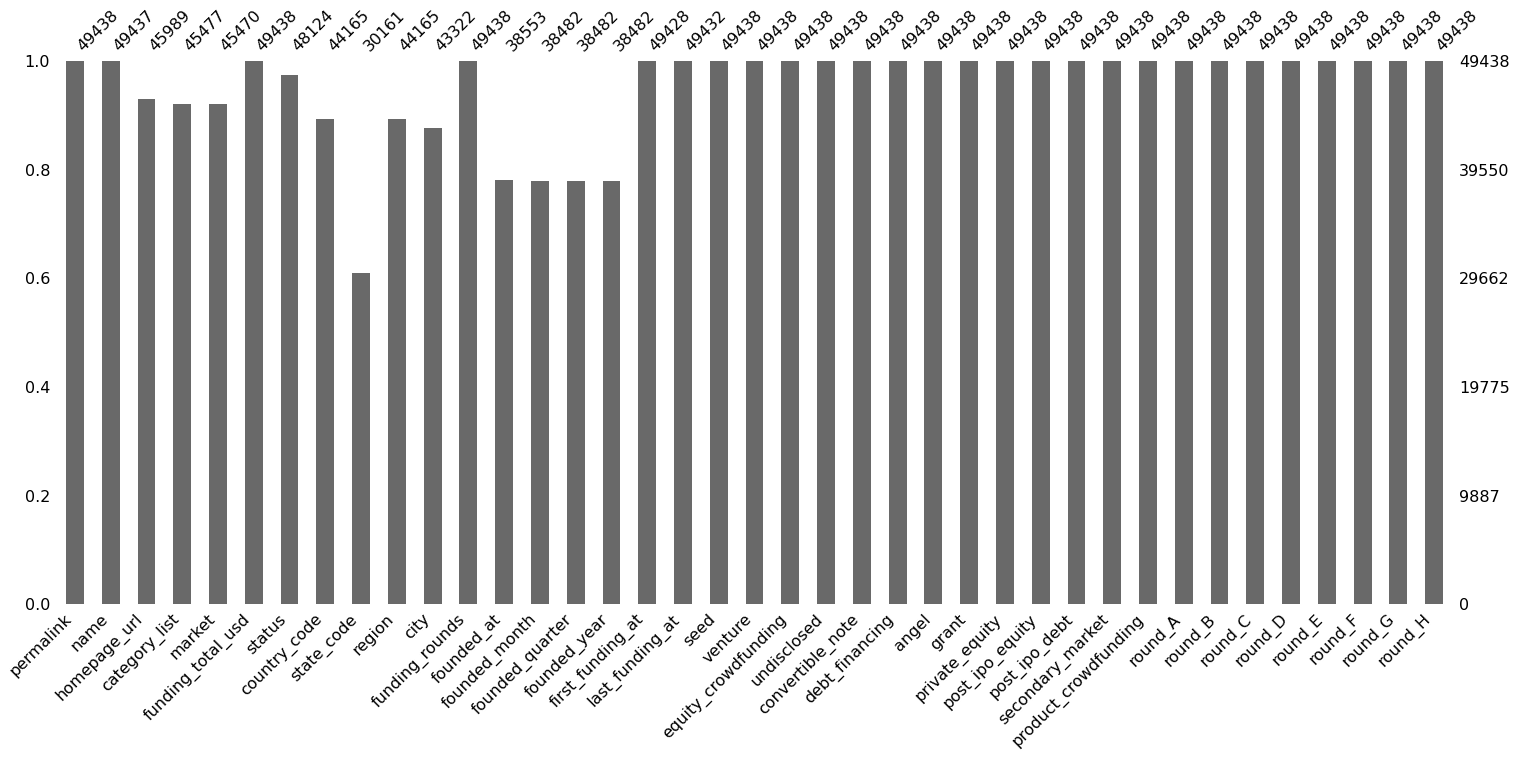

In [21]:
#Import the library
 
import missingno as msnum 
msnum.bar(df)

In [22]:

#cleaning the dataframe by dropping uneccessary columns
df2 = df2.drop(['permalink', 'homepage_url'], axis=1)
#Removing the row with no 'name'
df2.dropna(how='any', subset=['name'], axis=0, inplace=True)
#Extracting year value from "first_funding_at" and changing to int
df2['first_funding_at'] = df2.first_funding_at.str.split("-").str[0]
df2['first_funding_at'] = df2['first_funding_at'].astype(int)
#Extracting year value from "last_funding_at" and changing to int
df2['last_funding_at'] = df2.last_funding_at.str.split("-").str[0]
df2['last_funding_at'] = df2['last_funding_at'].astype(int)
#Changing the values in column "funding_total_usd" from string to float
df2[' funding_total_usd '] = df2[' funding_total_usd '].str.strip().str.replace(",","")
df2[' funding_total_usd '] = df2[' funding_total_usd '].replace("-",0).astype("float")
#Replacing missing status with "unknown"
df2['status'] = df2['status'].replace(np.nan,"unknown")
print(df2.shape)
df2.head()

(49437, 37)


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,...,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,...,0,0,0,0,0,0,0,0,0,0



> **Number of Startups founded and funded each year**




In [23]:
fig_founded_funding = go.Figure()
fig_founded_funding.add_trace(go.Histogram(x=df2['founded_year'], name="Founded year", marker=dict(opacity=0.9),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))
fig_founded_funding.add_trace(go.Histogram(x=df2['first_funding_at'], name="First Funding Year", marker=dict(opacity=0.5),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))
fig_founded_funding.update_layout(barmode='overlay',
                                 title="Overall Relation between starting of Startups and starting of Funding.",
                                 xaxis_title='Year', yaxis_title="Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20,legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1))
fig_founded_funding.update_yaxes(range=[0,5000])
# Add range slider
fig_founded_funding.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=10,
                     label="10y",
                     step="year",
                     stepmode="backward"),
                dict(count=20,
                     label="20y",
                     step="year",
                     stepmode="backward"),
                dict(count=50,
                     label="50y",
                     step="year",
                     stepmode="todate"),
                dict(count=100,
                     label="100y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_founded_funding.show()

We can see that startups were consistently getting founded after 1990 but that saw an increase in 1999 when the number of startups founded was 758 which increased by more than 70% as compared with 1998 with only 437 startups. Another observation is that, even though startups were getting founded in since the early 90s, they couldn't attract investors to fund their visions until 2004. But, in 2005, finally, investors took notice of the startups and 1418 startups got funding which is a sensational increase of above 420% and changed the startup scene forever. This is possibly the biggest jump in investments pouring into startups since its inception.

Note: The <b style="color:blue">BLUE</b> plot shows the numbe of 
startups founded per year while the <b style="color:red">RED</b> plot shows the number of startups the got their first funding in that year. 

> **Founding year of some of the Unicorns**

In [24]:
#Making the list of some of the most famous unicorns
df2_name_index = df2.set_index('name', drop=True)
startup_unicorns = ["Uber","Amazon","Google","Dropbox","Facebook","Alibaba",
                     "Stripe","Airbnb","Robinhood","Reddit",
                    "DigitalOcean","Coursera"]
color = ['Black','Orange','Blue','Darkblue', 'lightblue', 'darkorange','teal',
         'red','lightgreen','orange','blue','lightblue']
unicorn_founding_year = []
total_funding=[]
seed = []
vc = []
#Extracting its details from the dataset
for i in startup_unicorns:
    unicorn_founding_year.append(int(df2_name_index.loc[i]['founded_year']))
    total_funding.append(int(df2_name_index.loc[i][' funding_total_usd ']))
    seed.append(int(df2_name_index.loc[i]['seed']))
    vc.append(int(df2_name_index.loc[i]['venture']))        
df2_unicorns = pd.DataFrame(list(zip(startup_unicorns, unicorn_founding_year, total_funding, seed, vc, color)),
                           columns=['Unicorn name', 'Founding year','Total funding', 'Seed', 'Venture Capital', 'Color']).sort_values(by='Seed')
df2_unicorns.head()

,Unicorn name,Founding year,Total funding,Seed,Venture Capital,Color
1,Amazon,1994,8000000,0,8000000,Orange
2,Google,1998,25100000,0,25000000,Blue
4,Facebook,2004,2425700000,0,615200000,lightblue
5,Alibaba,1999,1112000000,0,0,darkorange
11,Coursera,2012,85000000,0,85000000,lightblue


In [25]:
fig_unicorn_founded = go.Figure()
fig_unicorn_founded.add_trace(go.Histogram(x=df2[df2['founded_year']>1990]['founded_year'], name="Founded year", marker=dict(opacity=0.9),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))

for i in df2_unicorns['Unicorn name']:
    fig_unicorn_founded.add_shape(
            # Line Vertical
            dict(
                type="line",
                xref="x",
                yref="paper",
                x0=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Founding year'])[0]),
                y0=0,
                x1=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Founding year'])[0]),
                y1=1,
                line=dict(
                    color=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Color'])[0]),
                    width=1
                )
    ))
    
fig_unicorn_founded.add_trace(go.Scatter(x=df2_unicorns['Founding year'],
                                        y=df2_unicorns.index*700+300, mode="text", text=df2_unicorns[['Unicorn name']], 
                                        textfont=dict(family="sans serif",size=15), showlegend=False,
                                        hovertemplate = '<br><b>Company</b>: %{text}'+'<br><i>Founding Year</i>: %{x}'
                                        ))

fig_unicorn_founded.update_layout(title="Years in which some Startup Unicorns were founded",
                             xaxis_title="Year", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20,legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1))
fig_unicorn_founded.show()

We can see that companies like Amazon and Google were among the first ones to capture the market as they happen to be founded when there was a continuous increase in the number of companies getting founded. After some time came Facebook which in a way changed the culture and opened the door for other startups and others did follow it.



> **Distribution of startups in various countries**

In [26]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=df2['country_code'].value_counts().index[:20], y=df2['country_code'].value_counts()[:20],
                           hovertemplate = '<br><b>Country</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Number of Startups in each Country",
                             xaxis_title="Country", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

From the chart above, the USA has an edge over the number of startups founded at 28792 which is more than 10 times the second country Britain with only 2642. But since this data is only till 2014, the present distribution can not be shown. The current situation is different as many other countries have taken charge and are innovating at a speed that has never been encountered.



> **Visualising distribution of startups among countries**

In [27]:
fig_country_map = go.Figure()
fig_country_map.add_trace(go.Choropleth(locations=df2['country_code'].value_counts().index,
                                       z=df2['country_code'].value_counts(),
                                       colorscale='Peach',
                                       colorbar_title="Nos. of Startups founded",
                                       ))
fig_country_map.update_layout(title_text="Number of Startups Country wise.", title_x=0.5, title_font_size=20, paper_bgcolor="mintcream")
fig_country_map.show()

> **Comparing Markets**

In [28]:
fig_market = go.Figure()
fig_market.add_trace(go.Bar(x=df2[' market '].value_counts().index[:30], y=df2[' market '].value_counts()[:30],
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(30)), colorscale="Sunsetdark")))

fig_market.update_layout(title="Number of Startups in each Market",
                             xaxis_title="Market", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_market.show()

We can see the top 30 markets, in the above plot, that different startups target to and it's of no surprise that more than 4500 startups fall into the "Software" market. With the advent of cloud computing and advances in ML/AI capabilities, many new startups are trying to use ML/AI techniques to simplify existing and workflows and even create entirely new applications. Software startups also attract a lot of entrepreneurs because of its scalability, the sheer possibility of creating software once and scaling it to be used by millions of people helps make a startup profitable.



> **Markets with Most and Least closed startups**

In [29]:
fig_closed = make_subplots(rows=1, cols=2, shared_yaxes=True,
                           subplot_titles=("Markets with Most closed Startups", "Markets with Least closed Startups"))
fig_closed.add_trace(go.Bar(x=df2[df2['status']=='closed'][' market '].value_counts()[:10].index,
                            y=df2[df2['status']=='closed'][' market '].value_counts()[:10], name="Market with most closed Startups",
                            marker=dict(color=list(range(20)), colorscale="reds_r"),
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                           ),
                            row=1, col=1)
fig_closed.add_trace(go.Bar(x=df2[df2['status']=='closed'][' market '].value_counts()[-10:].index,
                            y=df2[df2['status']=='closed'][' market '].value_counts()[-10:], name="Market with least closed Startups",
                            marker=dict(color=list(range(20)), colorscale="greens_r"),
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                           ),
                            row=1, col=2)

fig_closed.update_layout(showlegend=False, paper_bgcolor="mintcream")
fig_closed.show()

Without surprise, Sofware tops the charts not only in most startups founded but also for most startups closed, as everyone wants a piece of this cake but the numbers clearly show us that, that is not so easy. Another noticeable thing is that markets with least closed startups are



> **Markets with most and Least Acquired startups**

In [30]:
fig_acquired = make_subplots(rows=1, cols=2, shared_yaxes=True,
                           subplot_titles=("Markets with Most acquired Startups", "Markets with Least acquired Startups"), )
fig_acquired.add_trace(go.Bar(x=df2[df2['status']=='acquired'][' market '].value_counts()[:10].index,
                            y=df2[df2['status']=='acquired'][' market '].value_counts()[:10],
                            marker=dict(color=list(range(20)), colorscale="greens_r"),
                             hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                             ),
                            row=1, col=1)
fig_acquired.add_trace(go.Bar(x=df2[df2['status']=='acquired'][' market '].value_counts()[-10:].index,
                            y=df2[df2['status']=='acquired'][' market '].value_counts()[-10:],
                            marker=dict(color=list(range(20)), colorscale="reds_r"),
                             hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                             ),
                            row=1, col=2)

fig_acquired.update_layout(showlegend=False, paper_bgcolor="mintcream")
fig_acquired.show()

> **Relation between number of funding and Amount of funding in each round**

In [31]:
fig_funding_amt = px.scatter(df2[:5000],x="name", y="funding_rounds", size=' funding_total_usd ', color='status')

fig_funding_amt.update_layout(title='Plot Showing the Funding and Total funding acquired by Startups',
                              xaxis_title="Startups",yaxis_title="Funding Rounds",
                            xaxis_showticklabels=False,paper_bgcolor="mintcream",
                             title_font_size=20, title_x=0.5,legend=dict(orientation='h',yanchor='top',y=1.08,xanchor='right',x=1))

#fig_funding_amt.update_traces(hovertemplate = '<br><b>Company</b>: %{x}'+'<br><i>Funding Rounds</i>: %{y}'+'<br><i>Funding(in USD)</i>: %{marker.size}')
fig_funding_amt.show()

The above scatter plot shows an interesting picture of the startups and the rounds of funding and total funding received. The bigger the bubble size the bigger is the total funding received.



> **Comparing startups based on their status**

In [32]:
fig_status = make_subplots(rows=2, cols=2, specs=[[{"type": "domain", "colspan": 2}, None],[{"type": "domain"}, {"type": "domain"}]],
                          subplot_titles = ("Current status of all Startups", "Status of Startups founded before 2000", 
                                            "Status of Startups founded after 2000"))

fig_status.add_trace(go.Pie(labels=df2['status'].value_counts().index, values=df2['status'].value_counts()), row=1, col=1)

fig_status.add_trace(go.Pie(labels=df2[df2['founded_year']<2000]['status'].value_counts().index, values=df2[df2['founded_year']<2000]['status'].value_counts()), row=2, col=1)

fig_status.add_trace(go.Pie(labels=df2[df2['founded_year']>=2000]['status'].value_counts().index, values=df2[df2['founded_year']>=2000]['status'].value_counts()), row=2, col=2)

fig_status.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=11,
                         insidetextorientation='horizontal', rotation=-45)
fig_status.update_layout(height=800, paper_bgcolor="mintcream")
fig_status.show()

We see that 84% of all the startups are operating while 7% are acquired and 5% are closed. From the two pie charts in the second row, we notice that the number of startups that are acquired has decreased by more than half between the startups founded after and before 2000. Since this dataset if till 2014, this implies that till 2014, companies that are older than 14 years were acquired more than those with age less than 14 years. Though this doesn't exclusively mean that older companies are more likely to be acquired. It is also possible that some early companies took more time to scale to a significant user base to make a profit and seem attractive to be acquired. Another possibility can be that after the .com bubble bursts in 2002 and the housing crisis in the USA in 2008, very less startups were founded because of the economic crunch. And, slowly when the global economy became stable, large corporations had more money and started acquiring.



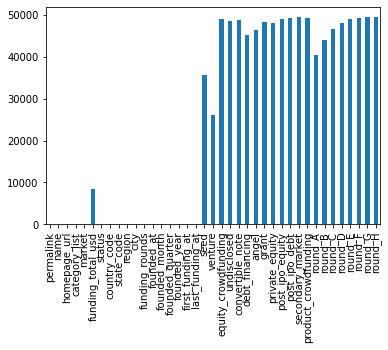

In [33]:

df.isin([0]).sum().plot(kind='bar')


# **Data Analysis**

In [34]:
df.isin([0]).sum() # the number of zeros in the dataset. Some columns have a lot of zeros

permalink                   0
name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd        8531
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

In [35]:
df.count() # number of values in each column


permalink               49438
name                    49437
homepage_url            45989
category_list           45477
market                  45470
funding_total_usd       49438
status                  48124
country_code            44165
state_code              30161
region                  44165
city                    43322
funding_rounds          49438
founded_at              38553
founded_month           38482
founded_quarter         38482
founded_year            38482
first_funding_at        49428
last_funding_at         49432
seed                    49438
venture                 49438
equity_crowdfunding     49438
undisclosed             49438
convertible_note        49438
debt_financing          49438
angel                   49438
grant                   49438
private_equity          49438
post_ipo_equity         49438
post_ipo_debt           49438
secondary_market        49438
product_crowdfunding    49438
round_A                 49438
round_B                 49438
round_C   

In [36]:
df.nunique() # finding out unique values for each column
# permalink has the highest number of unique values, this is agood indicator that it would good to use it as a unique ID

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
market                    753
funding_total_usd       14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3368
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3904
last_funding_at          3651
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C   

In [37]:
(df.isin([0]).sum()/df.count()) *100 # some of the columns have a lot of zeros. Calculating zeros as apercentage of the total rows for each column


permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
market                   0.000000
funding_total_usd       17.255957
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [38]:
df['status'].unique() #unique values in status column
#status column have three different values, this is what we are going to use to predict against

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [39]:
df.groupby('status')['name'].nunique() #number of companies with each status type
#a lot of operating values in the dataset

status
acquired      3691
closed        2602
operating    41762
Name: name, dtype: int64

In [40]:
df['country_code'].nunique() #different unique values in country_code
#lot fo different countries

115

In [41]:
df['country_code'].unique()

array(['USA', 'EST', 'GBR', 'ARG', nan, 'HKG', 'CHL', 'DEU', 'FRA', 'CHN',
       'CAN', 'AUS', 'ROM', 'NLD', 'SWE', 'RUS', 'DNK', 'IND', 'SGP',
       'NOR', 'BEL', 'IRL', 'ITA', 'ISR', 'ESP', 'THA', 'NZL', 'CZE',
       'CHE', 'BRA', 'HUN', 'JPN', 'BWA', 'KOR', 'NGA', 'FIN', 'TUR',
       'CRI', 'PRT', 'TWN', 'KHM', 'COL', 'UKR', 'LTU', 'ZAF', 'AUT',
       'PHL', 'ISL', 'BGR', 'URY', 'HRV', 'KEN', 'MEX', 'JOR', 'VNM',
       'GHA', 'PER', 'POL', 'IDN', 'PAN', 'LVA', 'ALB', 'UGA', 'LBN',
       'GRC', 'ARE', 'PAK', 'EGY', 'SVK', 'LUX', 'MYS', 'BHS', 'ARM',
       'DZA', 'MDA', 'TUN', 'NIC', 'TZA', 'CYP', 'NPL', 'BHR', 'CMR',
       'SRB', 'SAU', 'CYM', 'BRN', 'SLV', 'ECU', 'MLT', 'SVN', 'LAO',
       'TTO', 'MAR', 'MMR', 'BGD', 'DOM', 'BMU', 'LIE', 'MOZ', 'GTM',
       'AZE', 'MCO', 'ZWE', 'UZB', 'OMN', 'BLR', 'JEY', 'JAM', 'KWT',
       'MUS', 'CIV', 'SOM', 'MKD', 'GIB', 'SYC', 'MAF'], dtype=object)

In [42]:
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50) #number of companies in each country_code
# most of the values are from USA

country_code
USA    28756
GBR     2642
CAN     1405
CHN     1238
DEU      966
FRA      866
IND      849
ISR      681
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      283
KOR      246
CHE      222
DNK      210
FIN      194
ARG      149
BEL      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
TWN       41
HUN       41
THA       38
COL       35
PHL       32
LTU       31
GRC       31
PER       29
NGA       29
Name: name, dtype: int64

In [43]:
df.isnull().sum() #sum of null values in each column
# dataset also has some null values. Some of the columns have a lot of null values eg. state code and founded years

permalink                   0
name                        1
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10885
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at           10
last_funding_at             6
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [44]:
df.isnull().sum()/df.count() *100 #percentage of null values in each column
#around 40% of the data does not have a founded date. 
#City, region, state also have high number of null values so it would be good to leave these columns.

permalink                0.000000
name                     0.002023
homepage_url             7.499619
category_list            8.709897
market                   8.726633
funding_total_usd        0.000000
status                   2.730446
country_code            11.939318
state_code              63.913663
region                  11.939318
city                    14.117538
funding_rounds           0.000000
founded_at              28.233860
founded_month           28.470454
founded_quarter         28.470454
founded_year            28.470454
first_funding_at         0.020231
last_funding_at          0.012138
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_mark

In [45]:
df.groupby('status')['funding_total_usd'].describe() #grouping status and descriptive analysis of total funding
#acquired companies have higher mean and median funding total comapred to closed and operating. 
#Closed companies have the lowest funding total

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


In [46]:
df.groupby('status')['funding_rounds'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


In [47]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].mean().T #mean values of all columns and transposing it. Grouping by company status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



status,acquired,closed,operating
funding_rounds,2.013814e+00,1.434114e+00,1.689522e+00
funding_total_usd,2.075578e+07,7.023194e+06,1.295244e+07
seed,1.783670e+05,1.415031e+05,2.275289e+05
venture,1.385521e+07,5.212253e+06,7.194281e+06
equity_crowdfunding,2.406028e+03,0.000000e+00,6.984983e+03
undisclosed,1.559854e+05,3.732560e+04,1.304164e+05
convertible_note,6.423306e+03,1.012430e+04,2.587812e+04
debt_financing,1.905123e+06,6.263045e+05,1.989447e+06
angel,6.677897e+04,7.328595e+04,6.554313e+04
grant,2.570494e+04,5.857066e+04,1.811988e+05


In [48]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].median().T #median value of all columns and transposing it. Grouping by company status
       # median values are not being that useful as there is a lot of zeros in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



status,acquired,closed,operating
funding_rounds,2.0,1.0,1.0
funding_total_usd,6000000.0,500000.0,999857.0
seed,0.0,0.0,0.0
venture,5000000.0,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [49]:
df.groupby('status')['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].sum().T #sum of all columns and transposing it. Grouping by company status
       #sum of operating companies  are high for all columns as there is more data for acquired comanies. 
       #There is no money for acquired and close comanies that went till round G and H

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



status,acquired,closed,operating
funding_rounds,7435,3733,70671
funding_total_usd,76630346870,18281373291,541787796768
seed,658530823,368332465,9517305062
venture,51153432890,13567494277,300929587728
equity_crowdfunding,8883057,0,292174861
undisclosed,575897922,97158534,5455188093
convertible_note,23714844,26353561,1082455882
debt_financing,7033715054,1630270513,83216573110
angel,246547943,190763332,2741603525
grant,94902628,152459421,7579363282


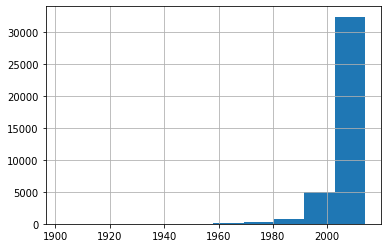

In [50]:
df['founded_year'].hist()#histogram of year variable
#most of the comapnies are around 2000

In [51]:
df['founded_year'].max() #newest year
 #2014 is the newest year

Timestamp('2014-01-01 00:00:00')

In [52]:
df['founded_year'].min() # oldest year
#1902 is the oldest year

Timestamp('1902-01-01 00:00:00')

In [53]:
df['market'].nunique() # 753 unique number of market

753

In [54]:
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5)#top 5  markets with the most funding


market
Biotechnology       73372948349
Mobile              49470108988
Software            42223476814
Clean Technology    37619938855
Health Care         29466081582
Name: funding_total_usd, dtype: int64

In [55]:
df.groupby('market')['name'].count().sort_values(ascending = False).head(5) #Top five markets in terms of count


market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: name, dtype: int64

In [56]:
df.groupby(df['market'])['permalink'].count().sort_values(ascending = False).head(5) #top 5 markets


market
Software         4620
Biotechnology    3688
Mobile           1983
E-Commerce       1805
Curated Web      1655
Name: permalink, dtype: int64

In [57]:
df['region'].unique()


array(['New York City', 'Los Angeles', 'Tallinn', ..., 'Jodhpur',
       'Muenchen', 'Buckinghamshire'], dtype=object)

In [58]:
df.groupby('region')['name'].count().sort_values(ascending = False).head(10) # top 10 regions. There is a lot from main cities like SF, NYC, Boston, London


region
SF Bay Area         6804
New York City       2577
Boston              1837
London              1588
Los Angeles         1389
Seattle              932
Washington, D.C.     785
Chicago              749
San Diego            700
Denver               636
Name: name, dtype: int64

In [59]:
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at'] # finding the difference in days between first and last funding dates

In [60]:
df['diff_funding'].describe() # mean is 317 days which is about 1 year


count                          49428
mean     317 days 13:40:14.857975236
std      637 days 22:39:33.229214760
min              -333 days +00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                375 days 00:00:00
max              17171 days 00:00:00
Name: diff_funding, dtype: object

In [61]:
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'M') # turning the difference into months


In [62]:
df['diff_funding_months'].describe()

count    49428.000000
mean        10.433713
std         20.959581
min        -10.940676
25%          0.000000
50%          0.000000
75%         12.320582
max        564.151215
Name: diff_funding_months, dtype: float64

In [63]:
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']
#creating new column for total investment
df['total_investment'].describe() # calculating the total investment for each company

count    4.943800e+04
mean     1.316667e+07
std      1.535540e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.772162e+06
max      3.007950e+10
Name: total_investment, dtype: float64

In [64]:
df['total_investment'].sum()

650933703144

In [65]:
df['funding_total_usd'].sum() # confirming that funding total and total investment is the same . We can drop one of the columns

650933703144

In [66]:
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])/np.timedelta64(1, 'M') # calculating how long it took them to get their first funding after being founded


In [67]:
df['diff_first_funding_months'].describe() #negative values shows that there is a founded date but there is no first funding date. 
#Median is around 17 month and mean is around 46 months. 


count    38547.000000
mean        46.688483
std        111.279943
min       -579.987269
25%          4.895378
50%         18.924413
75%         48.920922
max       2752.385059
Name: diff_first_funding_months, dtype: float64

# **Handling Missing Values**

In [68]:
df1 = df.copy()# copying dataframe


In [69]:
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])
#dropping unecessary columns that I dont plan on using

In [70]:
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months']) 
# dropping null values from these columns

In [71]:
df1.isnull().sum()# checking if there are any null values left


permalink               0
name                    0
market                  0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
diff_funding_months     0
total_investment        0
dtype: int64

In [72]:
df1.shape

(40471, 29)

# **Featured Engineering**

In [73]:
df1['diff_funding_year'] = round(df1['diff_funding_months']/12) # making new column that has difference in funding in year


# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50) #number of companies with difference in funding years
#There are not that many companies that has more than 13 year difference in funding

diff_funding_year
 0.0     26419
 1.0      4272
 2.0      3411
 3.0      2260
 4.0      1510
 5.0      1019
 6.0       602
 7.0       390
 8.0       220
 9.0       136
 10.0       75
-1.0        61
 11.0       33
 12.0       27
 13.0       14
 14.0        7
 16.0        7
 15.0        2
 17.0        2
 18.0        1
 24.0        1
 28.0        1
 47.0        1
Name: permalink, dtype: int64

In [75]:
print(df1['market'].nunique()) # number of unique market values
print(df1['country_code'].nunique()) # number of unique country codes

736
113


In [76]:
#Making new column called  Industry group
df1['Industry_Group'] = np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [77]:
df1['Industry_Group'].unique() #Industry groups unique values
df1['Industry_Group'].nunique() # number of industry groups

43

In [78]:
df1.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)#number of companies in each industry group
#Software still is the most

Industry_Group
Software                           8069
Biotechnology                      3494
Health Care                        2975
Internet Services                  2646
Commerce and Shopping              2267
Information Technology             1983
Mobile                             1800
Community and Lifestyle            1610
Advertising                        1548
Financial Services                 1265
Media and Entertainment            1234
Gaming                             1184
Professional Services               970
Education                           927
Data and Analytics                  911
Content and Publishing              815
Other                               796
Manufacturing                       690
Real Estate                         561
Privacy and Security                536
Sales and Marketing                 529
Transportation                      485
Travel and Tourism                  406
Clothing and Apparel                357
Consumer Electronics     

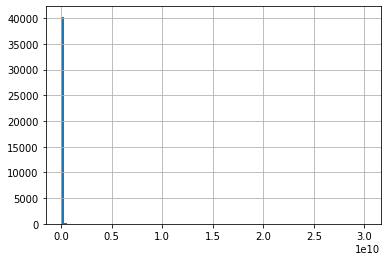

In [79]:
df1['total_investment'].hist(bins = 100) # histogram of total investment

In [80]:
country = pd.read_csv('https://raw.githubusercontent.com/Aryan0199/datasets/main/all.csv') # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum() # checking if there is null values

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [81]:
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
# merging both datasets and creating new column called continent
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [82]:
df1.groupby(by = ['Continent_Name'])['permalink'].count() #number of companies in each continent
# North America is the highest

Continent_Name
Africa        175
Americas    28576
Asia         3964
Europe       7400
Oceania       334
Name: permalink, dtype: int64

In [83]:
df1.shape # shape of datagrame


(40449, 34)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcd77b9ad0>,
      dtype=object)

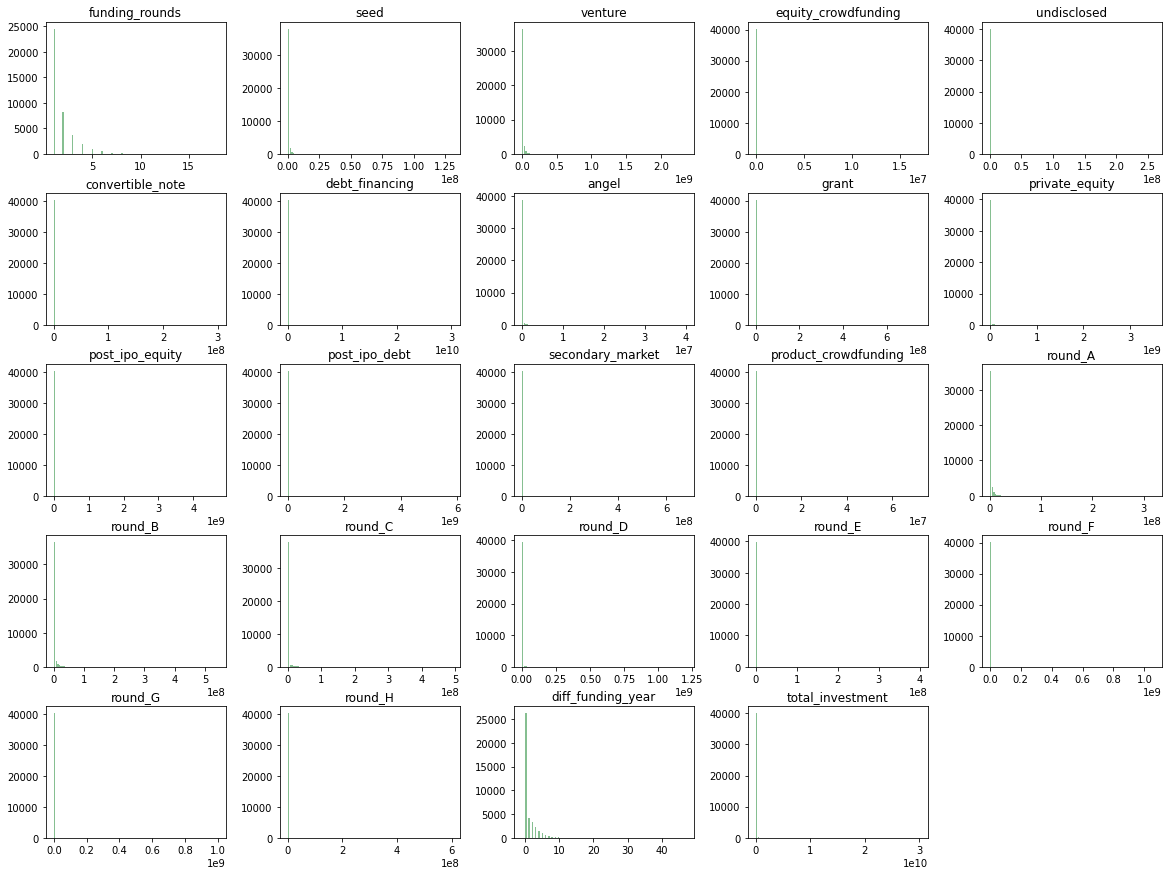

In [84]:
df1.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9) 
       # creating histogram of all numberical values, all values are very skewed

In [85]:
df1.isin([0]).sum()# total number of zeros in each column
# there is still a lot fo zeros

permalink                        0
name                             0
market                           0
status                           0
country_code                     0
funding_rounds                   0
seed                         29361
venture                      19744
equity_crowdfunding          39998
undisclosed                  39730
convertible_note             39957
debt_financing               36633
angel                        37775
grant                        39533
private_equity               39236
post_ipo_equity              40214
post_ipo_debt                40390
secondary_market             40433
product_crowdfunding         40275
round_A                      32279
round_B                      35345
round_C                      37744
round_D                      39204
round_E                      39950
round_F                      40281
round_G                      40417
round_H                      40445
diff_funding_months          24710
total_investment    

In [86]:
df2 = df1.copy() # copying the df1


In [87]:
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1) # dropping unnecessary columns


In [88]:
df2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40449.0,1.792702e+00,1.369873e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40449.0,2.356558e+05,1.139189e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,40449.0,8.570420e+06,3.083760e+07,0.0,0.0,100000.0,6000000.0,2.351000e+09
equity_crowdfunding,40449.0,5.912521e+03,1.706546e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40449.0,1.134948e+05,2.588395e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40449.0,2.723091e+04,1.581995e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40449.0,2.097525e+06,1.518881e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40449.0,6.832737e+04,5.769380e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40449.0,1.782089e+05,6.103884e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40449.0,2.285014e+06,3.401587e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [89]:
df2.isna().sum()

permalink               0
name                    0
status                  0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
total_investment        0
diff_funding_year       0
Industry_Group          0
Continent_Name          0
dtype: int64

In [90]:
df2.diff_funding_year.describe()

count    40449.000000
mean         0.995674
std          1.857302
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         47.000000
Name: diff_funding_year, dtype: float64

In [91]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
cat_invest = pd.cut(df2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df2.insert(0,'cat_total_investment',cat_invest) # creating new column called cat_total_investment

In [92]:
cat_invest.count()

40449

In [93]:
cat_diff_funding_year = pd.cut(df2.diff_funding_year, bins = [-2.0, 2.0, 49.0], labels=['low','high'])
#labeling diff_funding_year as low and high based on their descriptive summary. 
df2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)# creating new column called cat_diff_funding_year

In [94]:
df2.describe()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,total_investment,diff_funding_year
count,40449.000000,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,...,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,4.044900e+04,40449.000000
mean,1.792702,2.356558e+05,8.570420e+06,5.912521e+03,1.134948e+05,2.723091e+04,2.097525e+06,6.832737e+04,1.782089e+05,2.285014e+06,...,1.401716e+06,1.724082e+06,1.419747e+06,8.826462e+05,4.059930e+05,2.062461e+05,6.857565e+04,1.739474e+04,1.462161e+07,0.995674
std,1.369873,1.139189e+06,3.083760e+07,1.706546e+05,2.588395e+06,1.581995e+06,1.518881e+08,5.769380e+05,6.103884e+06,3.401587e+07,...,5.812933e+06,8.086544e+06,8.695924e+06,1.081154e+07,5.904911e+06,6.938729e+06,5.795034e+06,3.003615e+06,1.663973e+08,1.857302
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.150000e+05,0.000000
50%,1.000000,0.000000e+00,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.425000e+06,0.000000
75%,2.000000,2.500000e+04,6.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.281830e+06,1.000000
max,18.000000,1.300000e+08,2.351000e+09,1.700000e+07,2.594178e+08,3.000000e+08,3.007950e+10,4.000000e+07,7.505000e+08,3.500000e+09,...,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,3.007950e+10,47.000000


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40449 entries, 0 to 40448
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   cat_diff_funding_year  40449 non-null  category
 1   cat_total_investment   40449 non-null  category
 2   permalink              40449 non-null  object  
 3   name                   40449 non-null  object  
 4   status                 40449 non-null  object  
 5   funding_rounds         40449 non-null  int64   
 6   seed                   40449 non-null  int64   
 7   venture                40449 non-null  int64   
 8   equity_crowdfunding    40449 non-null  int64   
 9   undisclosed            40449 non-null  int64   
 10  convertible_note       40449 non-null  int64   
 11  debt_financing         40449 non-null  int64   
 12  angel                  40449 non-null  int64   
 13  grant                  40449 non-null  int64   
 14  private_equity         40449 non-null 

In [96]:
cat_funding_rounds = pd.cut(df2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
#labeling funding_rounds as low and high based on their descriptive summary. 
df2.insert(0,'cat_funding_rounds',cat_funding_rounds)# creating new column called cat_funding_rounds

In [97]:
cat_seed = pd.cut(df2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
#labeling seed as low and high  based on their descriptive summary. 
df2.insert(0,'cat_seed',cat_seed)# creating new column called cat_seed

In [98]:
cat_venture = pd.cut(df2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
#labeling venture as low, medium and high based on their descriptive summary. 
df2.insert(0,'cat_venture',cat_venture) # creating new column called cat_venture


In [99]:
# fixing the categorical columns  into numerical values so that we can use it on the model
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

In [100]:
#as a lot of the money columns have 0, we are turning them into new categories of 0 and 1
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1


df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1


df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [101]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name']) # using label encoder on continent
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group']) # using label encoder on industry group

In [102]:
df2.isna().sum()

cat_venture                 0
cat_seed                    0
cat_funding_rounds          0
cat_diff_funding_year       0
cat_total_investment        0
permalink                   0
name                        0
status                      0
funding_rounds              0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
total_investment            0
diff_funding_year           0
Industry_Group              0
Continent_

In [103]:
df3 = df2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']] # Selecting the columns we need for the model

df3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,11,1,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,0,0,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,1,0,0,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,1,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,1,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df3.dtypes #data type of each column
# making sure they are all numbers

cat_status                    int64
cat_Industry_Group            int64
cat_Continent_Name            int64
cat_funding_rounds            int64
cat_diff_funding_year         int64
cat_total_investment          int64
cat_equity_crowdfunding     float64
cat_venture                   int64
cat_seed                      int64
cat_undisclosed             float64
cat_convertible_note        float64
cat_debt_financing          float64
cat_angel                   float64
cat_grant                   float64
cat_private_equity          float64
cat_post_ipo_equity         float64
cat_post_ipo_debt           float64
cat_secondary_market        float64
cat_product_crowdfunding    float64
cat_round_A                 float64
cat_round_B                 float64
cat_round_C                 float64
cat_round_D                 float64
cat_round_E                 float64
cat_round_F                 float64
cat_round_G                 float64
cat_round_H                 float64
dtype: object

In [105]:
df3.isna().sum() #number of null values in each column
# making sure there is no null values

cat_status                  0
cat_Industry_Group          0
cat_Continent_Name          0
cat_funding_rounds          0
cat_diff_funding_year       0
cat_total_investment        0
cat_equity_crowdfunding     0
cat_venture                 0
cat_seed                    0
cat_undisclosed             0
cat_convertible_note        0
cat_debt_financing          0
cat_angel                   0
cat_grant                   0
cat_private_equity          0
cat_post_ipo_equity         0
cat_post_ipo_debt           0
cat_secondary_market        0
cat_product_crowdfunding    0
cat_round_A                 0
cat_round_B                 0
cat_round_C                 0
cat_round_D                 0
cat_round_E                 0
cat_round_F                 0
cat_round_G                 0
cat_round_H                 0
dtype: int64

# **Statistics and Variable Selection**

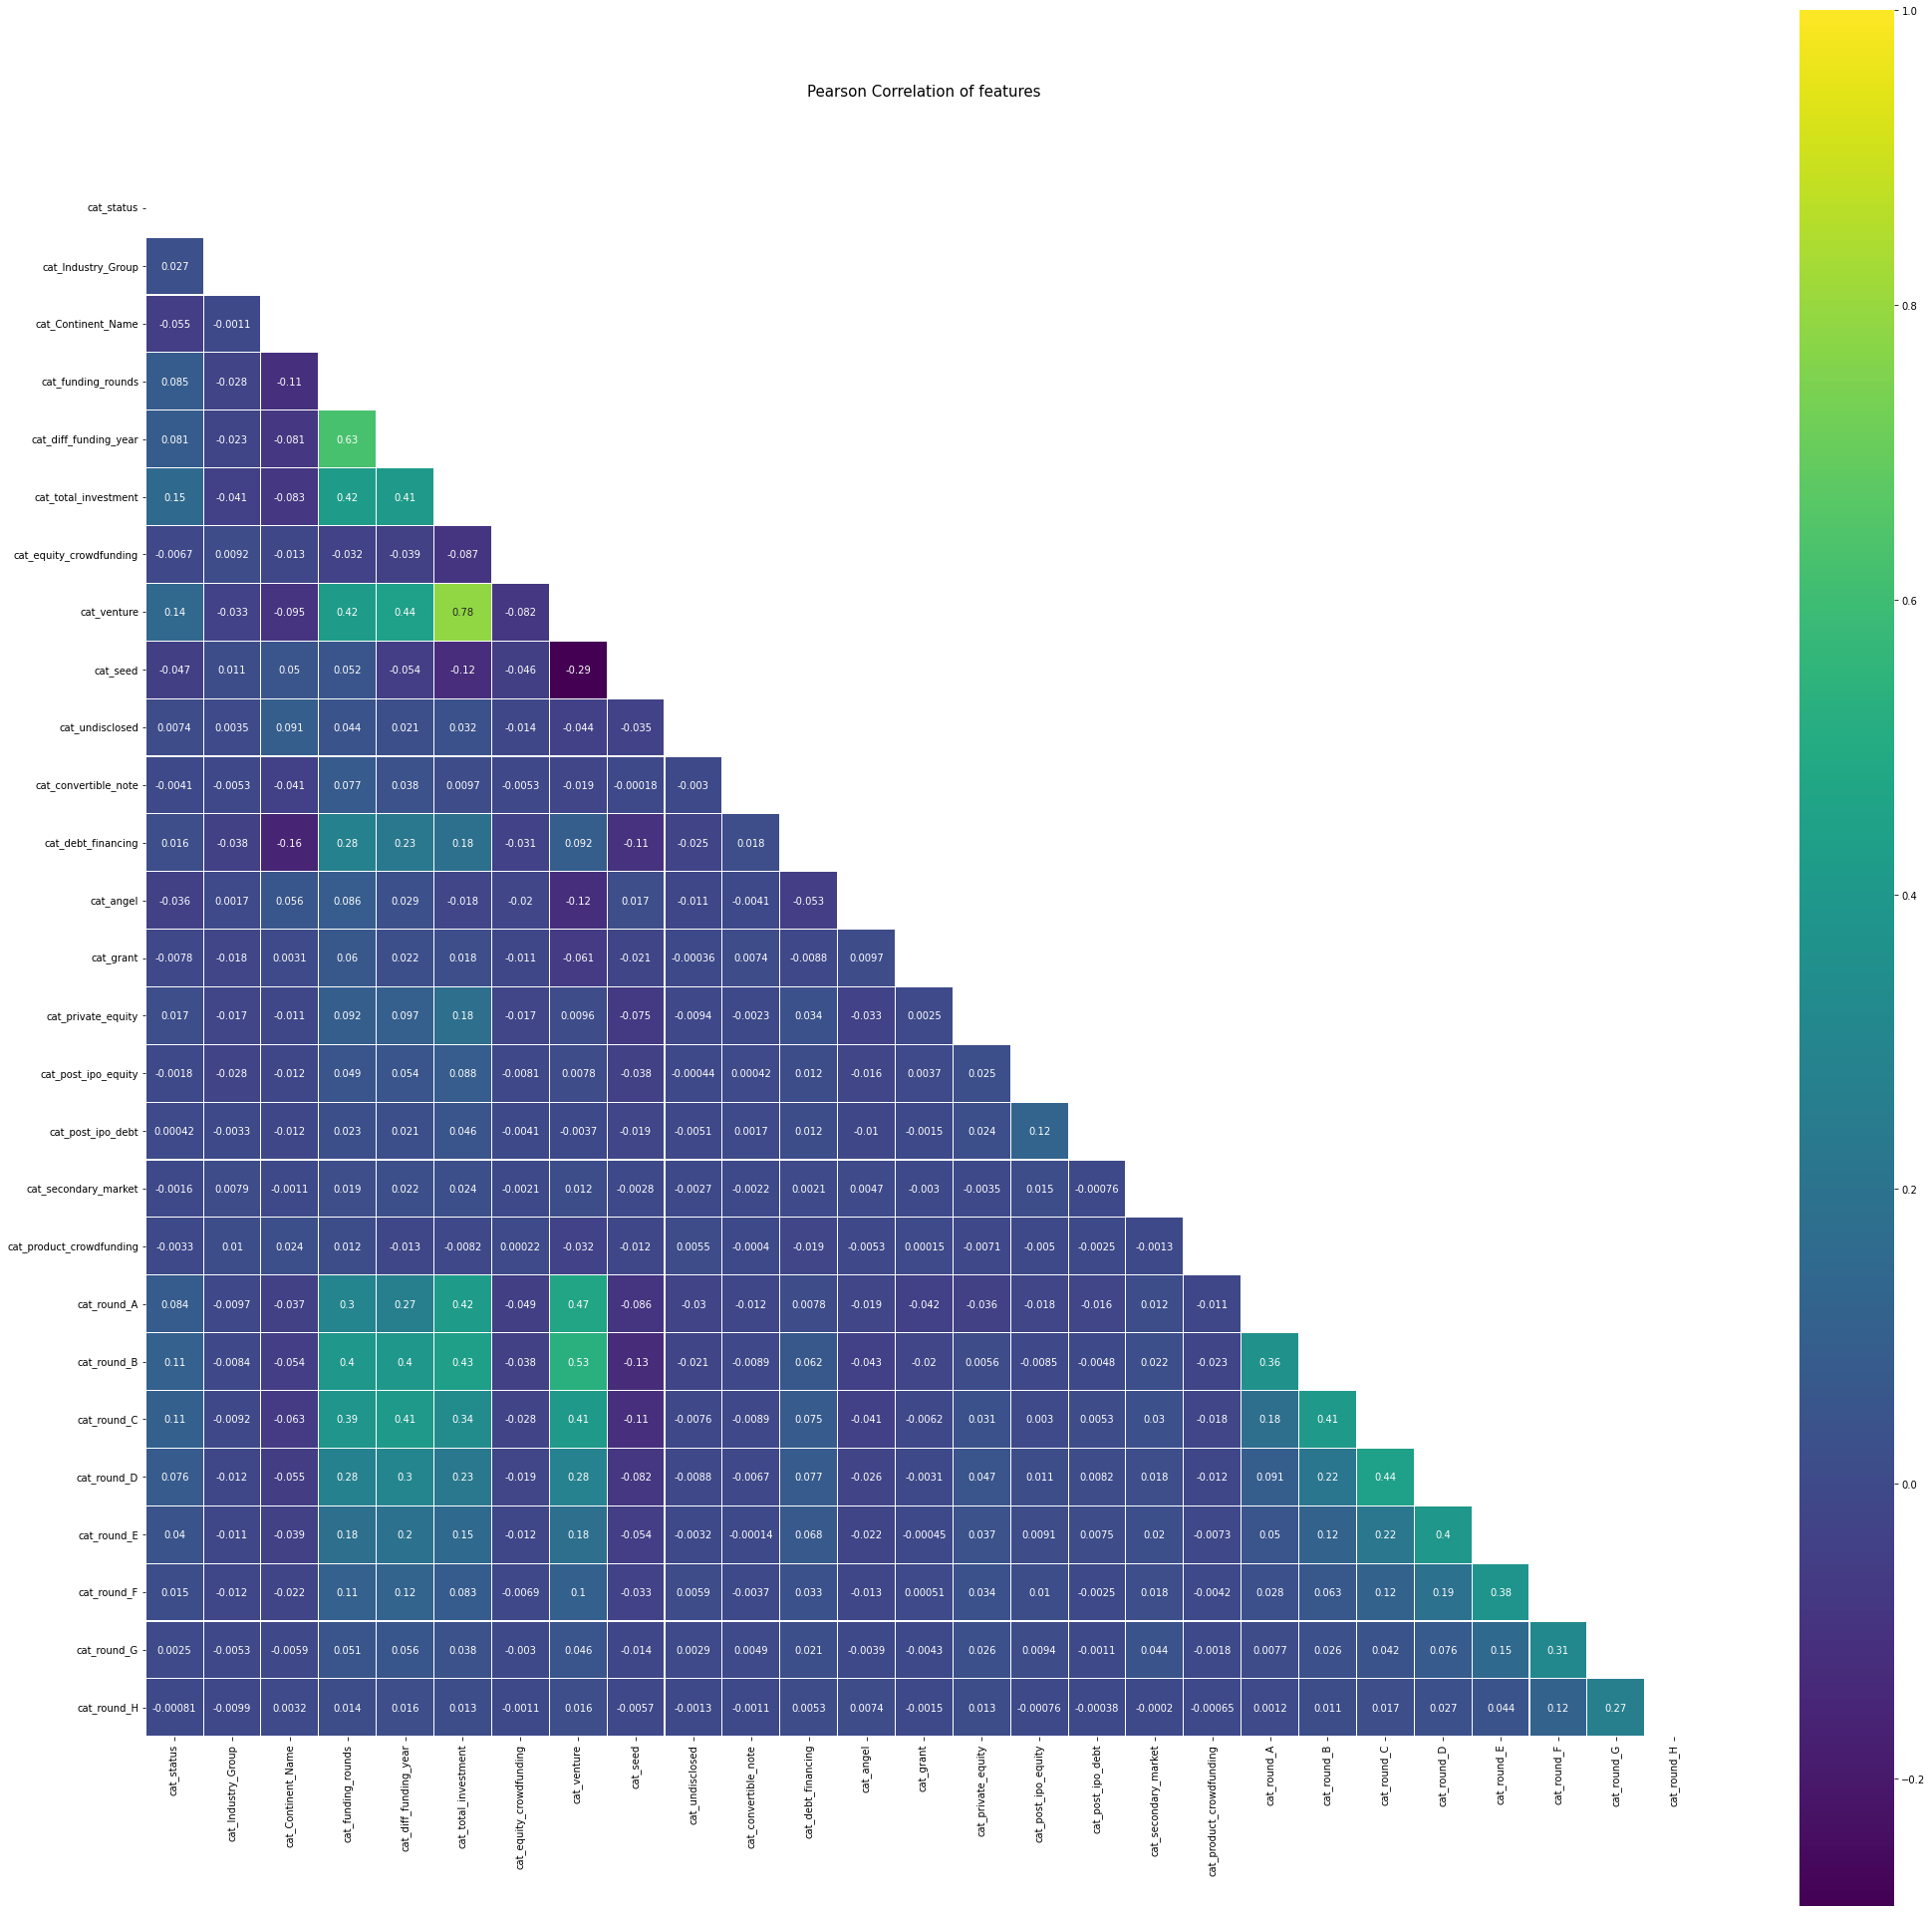

In [106]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

#we can remove cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant , cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H

In [107]:
df3.shape


(40449, 27)

In [108]:
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # selecting the columns we need
       #you can use this dataset for the model. Created after excluding columns with less correlation

df4.shape # shape of dataset

(40449, 17)

In [109]:
df4.head()


,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,2,11,1,0,0,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,0,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Making new datafram that removes the operating value
df5 = df3.copy()
df5.drop(df5.index[df5['cat_status'] == 1], inplace = True)
df5 = df5.replace({'cat_status':2},1) # only 0 and 1, 0 means closed and 1 means acquired

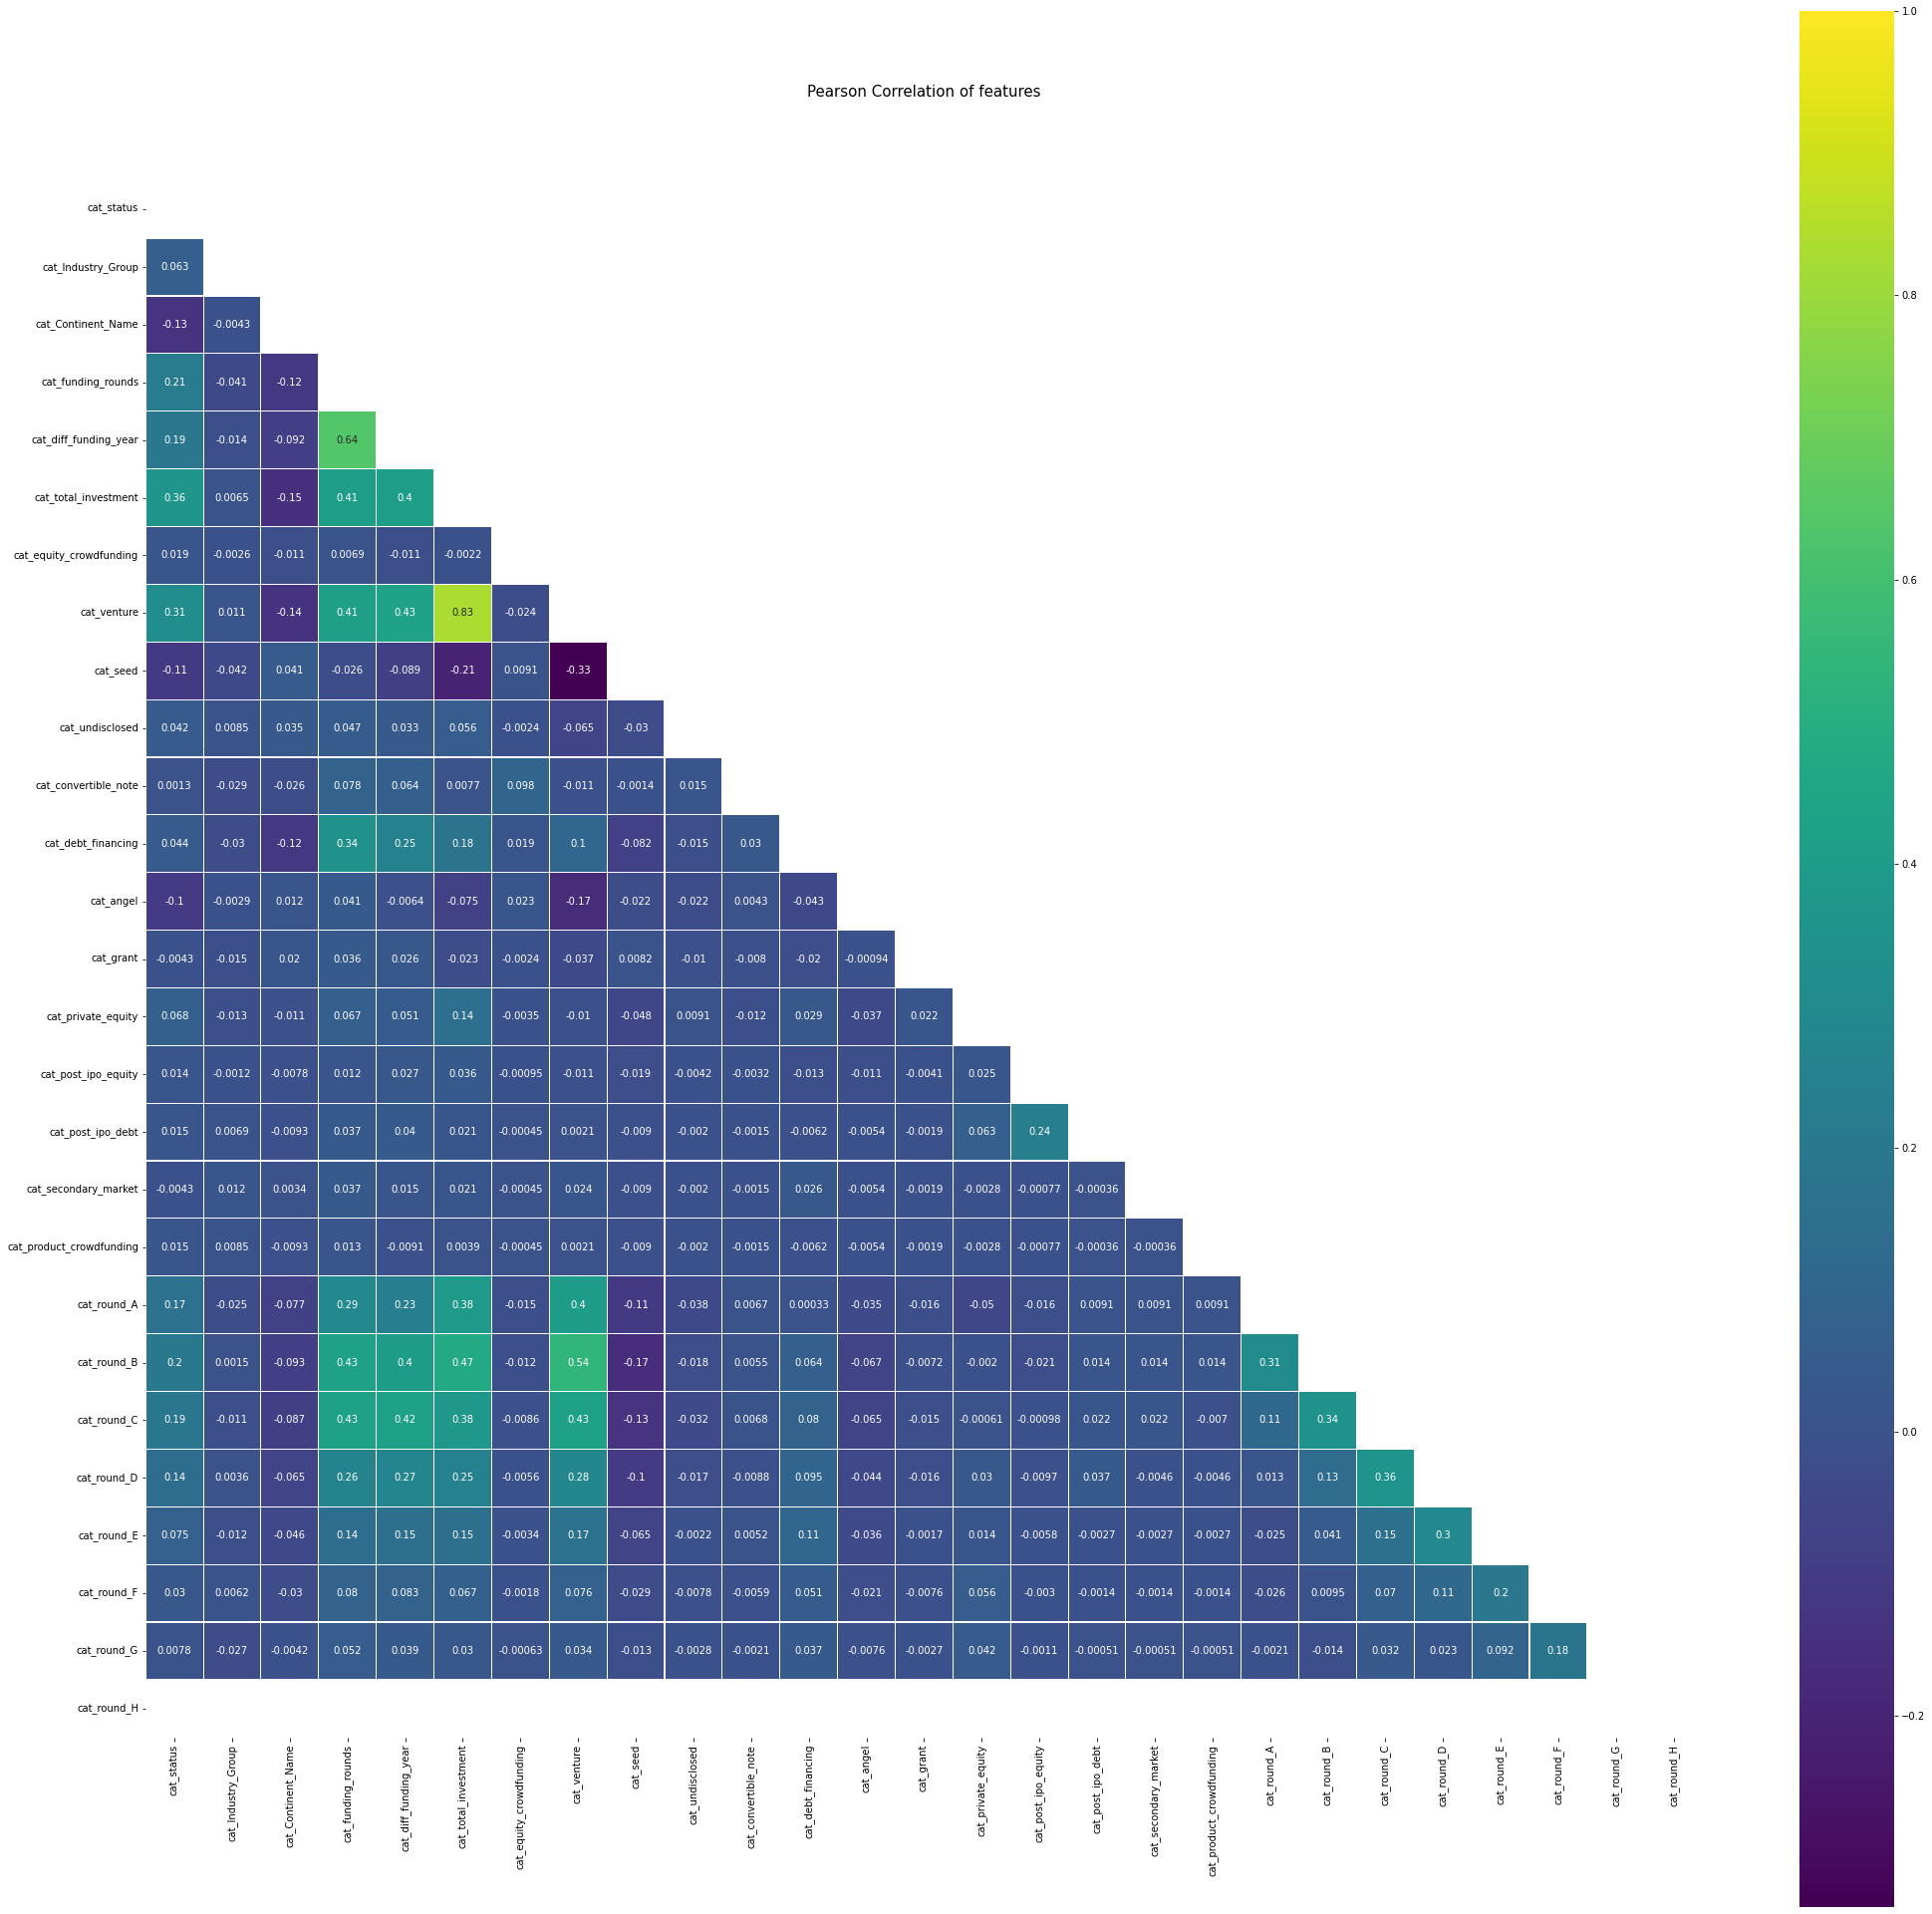

In [111]:
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df5.corr())
sns.heatmap(df5.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)

#we can remove cat_equity_crowdfunding, cat_undisclosed, cat_convertible_note, cat_grant , cat_post_ipo_equity, cat_post_ipo_debt, cat_secondary_market, cat_product_crowdfunding, cat_round_G, cat_round_H. This is the same as the other dataframe
#venture and investment is highly correlated. Also high correlation between the round and the round after it.

In [112]:
df5 = df5[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # selecting the columns we need based on the correlation matrix

In [113]:
df5['cat_status'].count()# number of companies


5497

In [114]:
df5.shape # shape of dataframe


(5497, 17)

# **Modelling**

In [115]:
Y = df4.cat_status #setting Y variable
X = df4.drop('cat_status', axis = 1) #dropping status and setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)#test and train dataset

In [116]:
!pip install dabl
import dabl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
accuracies = {}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



In [117]:
sc = dabl.SimpleClassifier().fit(X_train, Y_train)
print("Accuracy score", sc.score(X_test, Y_test))
acc=sc.score(X_test, Y_test)*100
accuracies['Base Model']=acc
print("Test Accuracy of Base Model: {:.2f}%".format(acc))

Running DummyClassifier()
accuracy: 0.865 recall_macro: 0.333 precision_macro: 0.288 f1_macro: 0.309
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.865 recall_macro: 0.333 precision_macro: 0.288 f1_macro: 0.309

Running GaussianNB()
accuracy: 0.128 recall_macro: 0.397 precision_macro: 0.387 f1_macro: 0.144
=== new best GaussianNB() (using recall_macro):
accuracy: 0.128 recall_macro: 0.397 precision_macro: 0.387 f1_macro: 0.144

Running MultinomialNB()
accuracy: 0.803 recall_macro: 0.390 precision_macro: 0.360 f1_macro: 0.373
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.082 recall_macro: 0.432 precision_macro: 0.072 f1_macro: 0.115
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.082 recall_macro: 0.432 precision_macro: 0.072 f1_macro: 0.115

Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.382 recall_macro: 0.467 precision_macro: 0.381 f1_macr

## **Model: Decision Tree**

In [118]:
#checking size of each dataset
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (32359, 16)
Shape of X_test=> (8090, 16)
Shape of Y_train=> (32359,)
Shape of Y_test=> (8090,)


In [119]:
# testing with regular decision tree
clf = DecisionTreeClassifier(random_state = 100) 
clf = clf.fit(X_train, Y_train)#train decison tree classifier

In [120]:
preds = clf.predict(X_test) # predict the response for test data
acc=accuracy_score(Y_test,preds)

print("Test Accuracy of Base Model: {:.2f}%".format(acc))
print(accuracy_score(Y_test,preds))
print(accuracy_score(Y_train,clf.predict(X_train)))

print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))
#accuracy score is high for training dataset which shows that it might be overfitting

Test Accuracy of Base Model: 0.84%
0.8379480840543881
0.8878519113693254

Classification Report

              precision    recall  f1-score   support

      Closed       0.07      0.01      0.02       473
   Operating       0.86      0.97      0.91      6949
    Acquired       0.21      0.06      0.10       668

    accuracy                           0.84      8090
   macro avg       0.38      0.35      0.34      8090
weighted avg       0.76      0.84      0.79      8090



In [121]:
#commenting the hyper parameter tuning part as it takes too long on kaggle to run it.
#Hyper parameter tuning
"""
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,20),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,10)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 3, # cross validation method
                    verbose = 1,
                    n_jobs = -1) # set to use all processors

grid.fit(X_train, Y_train)
"""

'\nparam_dict = {\n    "criterion":[\'gini\', \'entropy\'],\n    "max_depth": range(1,20),\n    "min_samples_split": range(1,20),\n    "min_samples_leaf": range(1,10)\n}\n\ndecision_tree = DecisionTreeClassifier()\ngrid = GridSearchCV(decision_tree,\n                    param_grid = param_dict,\n                    cv = 3, # cross validation method\n                    verbose = 1,\n                    n_jobs = -1) # set to use all processors\n\ngrid.fit(X_train, Y_train)\n'

In [122]:
# finding the best grid parameter
#grid.best_params_ 

In [123]:
#grid.best_estimator_


In [124]:
#using paramerters from the grid search to create the model
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split=2, random_state=40)
clf.fit(X_train,Y_train) #fitting into the model
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
#test and train score are closer

#print(accuracy_score(Y_train,y_train_pred),accuracy_score(Y_test,y_test_pred)) #accuracy score of train and test data. 
acc=accuracy_score(Y_test,y_test_pred)
accuracies['Decision Tree Model ']=acc*100
print("Test Accuracy of Decision Tree Model: {:.5f}%".format(acc*100))
print('\nClassification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired'])) # classification report

Test Accuracy of Decision Tree Model: 85.89617%

Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00       473
   Operating       0.86      1.00      0.92      6949
    Acquired       0.00      0.00      0.00       668

    accuracy                           0.86      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.74      0.86      0.79      8090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



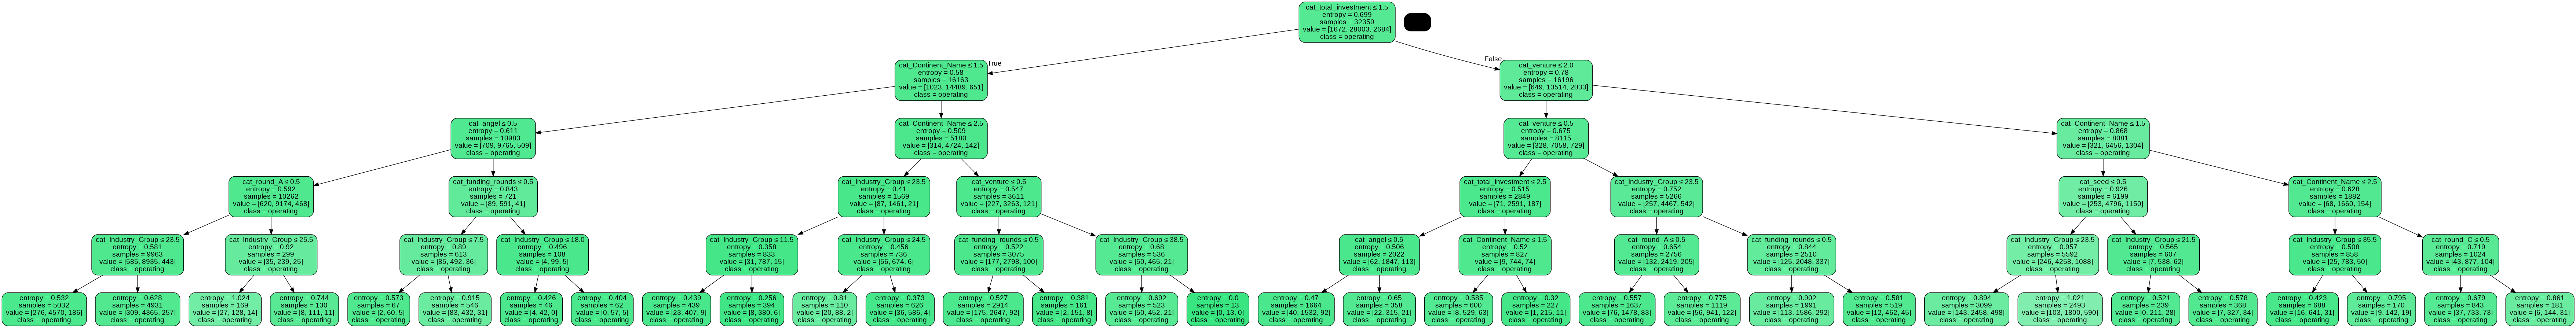

In [125]:
#visual representation of the model
xvar = df4.drop('cat_status', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['closed','operating','acquired'])

(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Using grid search, we tried to find features that would get the best accuracy rate. Our grid search gave us the best result when the criterion was entropy, max depth of 5, min sample leaf of 1 and min sample leaf of 2. According to the model total investment, continent name, and venture were the most important features.

In [126]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(6)#top 20 feature impacting decision tree split

,FeatureImportance
cat_total_investment,0.489868
cat_venture,0.148059
cat_Continent_Name,0.118214
cat_Industry_Group,0.118092
cat_seed,0.032876
cat_round_A,0.031387


Using the same classification model, we now tried predicting with a sample dataset.



In [127]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
sample # sample dataset

,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,15,4,0,0,1,2,1,0,0,1,0,1,1,0,1,0
1,11,0,0,1,3,1,1,0,0,0,0,0,0,1,0,1
2,18,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1
3,21,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1
4,5,2,1,0,3,1,0,1,0,1,0,1,1,1,1,1


In [128]:
ynew = clf.predict(sample)
ynew #predicted value from the sample dataset. 0 means close, 1 means operating, 2 means acquired

array([1, 1, 1, 1, 1])

Decision Tree: Binomial Classification

In [129]:
Y5 = df5.cat_status # need to be classified as this
X5 = df5.drop('cat_status', axis = 1) #dropping status and leaving only features
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)

In [130]:
#testing with small decision tree 
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned5.fit(X_train5, Y_train5) # fitting the model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=20)

In [131]:
preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)

print(accuracy_score(Y_test5, preds_pruned5)) # accuracy score of test dataset

print(accuracy_score(Y_train5, preds_pruned_train5))#accuracy score of train dataset
#accuracy score for train dataset is more than test so model might be overfitting

0.6836363636363636
0.7047987264043666


In [132]:
print('\nClassification Report\n') # Classification report
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.60      0.58      0.59       432
     Class 1       0.73      0.75      0.74       668

    accuracy                           0.68      1100
   macro avg       0.67      0.67      0.67      1100
weighted avg       0.68      0.68      0.68      1100



In [133]:
#commenting this part as kaggle take too long
"""
#using grid search to do hyper parameter tuning
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,20),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,10)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10, # cross validation method
                    verbose = 1,
                    n_jobs = -1) # set to use all processors


grid.fit(X_train5, Y_train5)
"""

'\n#using grid search to do hyper parameter tuning\nparam_dict = {\n    "criterion":[\'gini\', \'entropy\'],\n    "max_depth": range(1,20),\n    "min_samples_split": range(1,20),\n    "min_samples_leaf": range(1,10)\n}\n\ndecision_tree = DecisionTreeClassifier()\ngrid = GridSearchCV(decision_tree,\n                    param_grid = param_dict,\n                    cv = 10, # cross validation method\n                    verbose = 1,\n                    n_jobs = -1) # set to use all processors\n\n\ngrid.fit(X_train5, Y_train5)\n'

In [134]:
#grid.best_params_ # best grid parameters

In [135]:
#grid.best_estimator_


In [136]:
#using parameter from grid to run model
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=1, min_samples_split=2) 
clf_pruned5.fit(X_train5, Y_train5)

preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)
print(accuracy_score(Y_test5,preds_pruned5))#accuracy score
print(accuracy_score(Y_train5,preds_pruned_train5))# accuracy score

#classification report
print('\nClassification Report\n')
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))


0.6836363636363636
0.7047987264043666

Classification Report

              precision    recall  f1-score   support

     Class 0       0.60      0.58      0.59       432
     Class 1       0.73      0.75      0.74       668

    accuracy                           0.68      1100
   macro avg       0.67      0.67      0.67      1100
weighted avg       0.68      0.68      0.68      1100



The accurate rate came up to be 0.69 and it was good at predicting for both closed and acquired companies.



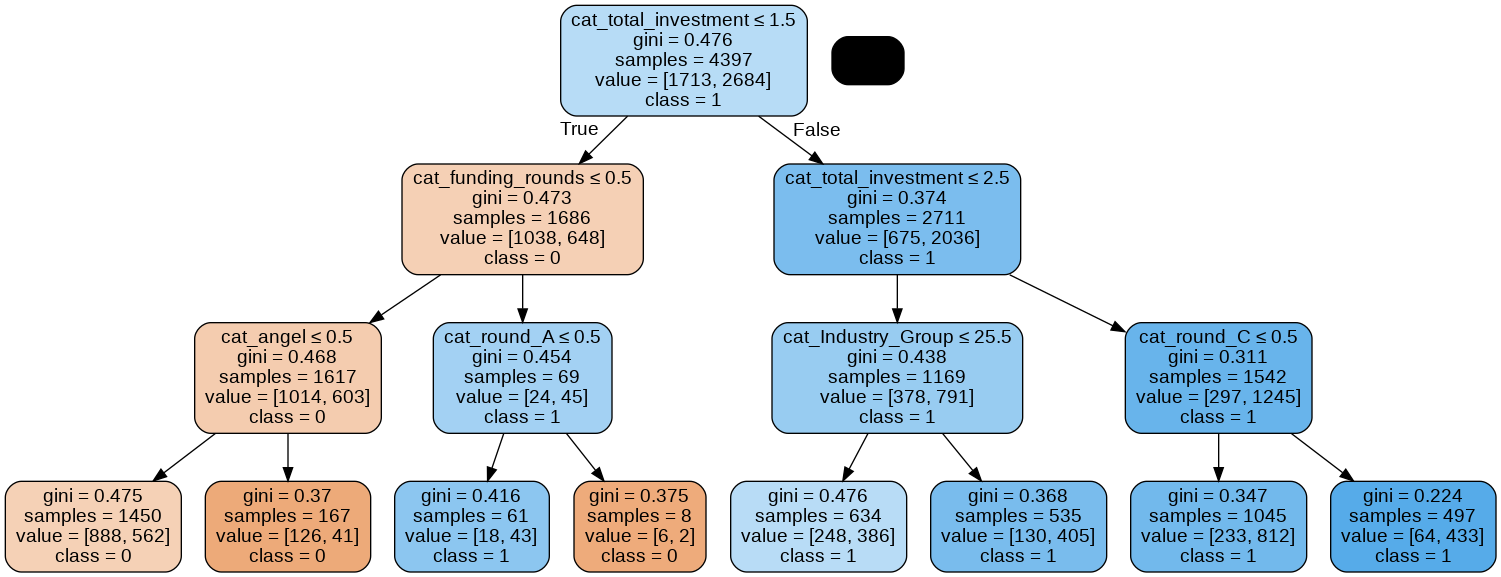

In [137]:
#visualizing the tree
xvar5 = df5.drop('cat_status', axis=1)
feature_cols5 = xvar5.columns
dot_data5 = StringIO()
export_graphviz(clf_pruned5, out_file=dot_data5,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols5,class_names=['0','1'])

(graph, ) = graph_from_dot_data(dot_data5.getvalue())
Image(graph.create_png())

According to this model, total investment, funding rounds, industry group, continent name were important features in understanding if a company will be successful or not. The model shows that total investment is very important and if it is less then the company is likely to be closed.

In [138]:
#Calculating feature importance
feat_importance5 = clf_pruned5.tree_.compute_feature_importances(normalize=False)
feat_imp_dict5 = dict(zip(feature_cols5, clf_pruned5.feature_importances_))
feat_imp5 = pd.DataFrame.from_dict(feat_imp_dict5, orient='index')
feat_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp5.sort_values(by=['FeatureImportance'], ascending=False).head()#top 5 feature impacting decision tree split

,FeatureImportance
cat_total_investment,0.888286
cat_Industry_Group,0.037445
cat_funding_rounds,0.030334
cat_angel,0.017768
cat_round_C,0.017565


Using this mode, we now tried predicting with a sample dataset.

In [139]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = clf_pruned5.predict(sample)
ynew # predicting using decision tree binomial model

array([1, 1, 0, 1, 1])

# **Model: Random Forest**

In [140]:
Y = df4.cat_status
X = df4.drop('cat_status', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)# test and train dataset

In [141]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(n_estimators=1000, random_state=42)

In [142]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.07      0.00      0.01       473
     Class 2       0.86      0.98      0.92      6949
     Class 3       0.21      0.05      0.08       668

    accuracy                           0.85      8090
   macro avg       0.38      0.34      0.33      8090
weighted avg       0.76      0.85      0.80      8090



It showed that Industry Group is the most important feature. The important features are as follows:



In [143]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cat_Industry_Group   Importance: 0.52
Variable: cat_Continent_Name   Importance: 0.07
Variable: cat_total_investment Importance: 0.06
Variable: cat_funding_rounds   Importance: 0.04
Variable: cat_diff_funding_year Importance: 0.04
Variable: cat_venture          Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_round_A          Importance: 0.03
Variable: cat_round_B          Importance: 0.03
Variable: cat_round_C          Importance: 0.03
Variable: cat_angel            Importance: 0.02
Variable: cat_private_equity   Importance: 0.02
Variable: cat_round_D          Importance: 0.02
Variable: cat_round_E          Importance: 0.01
Variable: cat_round_F          Importance: 0.01


In [144]:
#commenting this part as Kaggle take too long to run
"""
#Using Random Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
"""

"\n#Using Random Grid\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n"

In [145]:
"""
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
"""

'\n# Use the random grid to search for best hyperparameters\n\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, Y_train)\n'

In [146]:
#rf_random.best_params_ # finding best parameter


We used random grid search for hyper parameter tuning where-- 'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True. Using these parameter the accuracy rate came up to be 0.86

In [147]:
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc.fit(X_train, Y_train) 

rfc_pred_test = rfc.predict(X_test)
acc=accuracy_score(Y_test,rfc_pred_test)

accuracies['Random Forest Model ']=acc*100
print("Test Accuracy of Random Forest Model: {:.5f}%".format(acc*100))
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

Test Accuracy of Random Forest Model: 85.89617%
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       473
     Class 2       0.86      1.00      0.92      6949
     Class 3       0.00      0.00      0.00       668

    accuracy                           0.86      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.74      0.86      0.79      8090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Used the model to predict for a sample dataset

In [148]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = rfc.predict(sample)
ynew # 0 means close, 1 means operating and 2 means acquired

array([1, 1, 1, 1, 1])

**Random Forest: Binomial Classification**
To predict for acquired and closed companies only, we use a random forest model too. We used the same steps as the previous models.

In [149]:
Y5 = df5.cat_status# setting y variable
X5 = df5.drop('cat_status', axis = 1) # setting features
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42) # test and train data

In [150]:
rfc5 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc5.fit(X_train5, Y_train5) # using df5 and fitting the data

RandomForestClassifier(n_estimators=1000, random_state=42)

In [151]:
rfc_pred_test5 = rfc5.predict(X_test5) # predicting for test
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))# classification report

              precision    recall  f1-score   support

     Class 0       0.59      0.57      0.58       432
     Class 1       0.73      0.74      0.74       668

    accuracy                           0.68      1100
   macro avg       0.66      0.66      0.66      1100
weighted avg       0.68      0.68      0.68      1100



According to the model the important features are:



In [152]:
# Get numerical feature importances
importances = list(rfc5.feature_importances_)
feature_list = list(X5.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#Industry group, Total investment and continent name is most important features. We can only include these moving forward

Variable: cat_Industry_Group   Importance: 0.4
Variable: cat_total_investment Importance: 0.17
Variable: cat_venture          Importance: 0.08
Variable: cat_Continent_Name   Importance: 0.07
Variable: cat_funding_rounds   Importance: 0.04
Variable: cat_diff_funding_year Importance: 0.04
Variable: cat_round_A          Importance: 0.04
Variable: cat_round_B          Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_angel            Importance: 0.02
Variable: cat_round_C          Importance: 0.02
Variable: cat_private_equity   Importance: 0.01
Variable: cat_round_D          Importance: 0.01
Variable: cat_round_E          Importance: 0.01
Variable: cat_round_F          Importance: 0.0


In [153]:
#commenting this part and it takes too long
"""
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
"""

"\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n"

In [154]:
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train5, Y_train5)
"""

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train5, Y_train5)\n'

In [155]:
#rf_random.best_params_ # best parameters


In [156]:
#using the parameters from grid search to make the model
rfc5 = RandomForestClassifier(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_features= "auto", max_depth =10, bootstrap = True, random_state = 42)
rfc5.fit(X_train5, Y_train5) 

rfc_pred_test5 = rfc5.predict(X_test5)
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))
#scuracy rate remians the same, slight variation in other values

              precision    recall  f1-score   support

     Class 0       0.60      0.59      0.60       432
     Class 1       0.74      0.75      0.74       668

    accuracy                           0.69      1100
   macro avg       0.67      0.67      0.67      1100
weighted avg       0.69      0.69      0.69      1100



We used this model to predict for a sample dataframe.


In [157]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])


In [158]:
ynew = clf_pruned5.predict(sample)
ynew # predicting using decision tree binomial model. 0 means closed and 1 means acquired

array([1, 0, 1, 0, 1])

# **Naive Bayes**

In [159]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [160]:
# print("Naive Bayes score: ",nb.score(X_test, Y_test))
NBacc=nb.score(X_test, Y_test)*100;
accuracies['Naive Bayes Model ']=NBacc
print("Test Accuracy of Naive Bayes Algorithm: {:.5f}%".format(NBacc))
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

Test Accuracy of Naive Bayes Algorithm: 75.51298%
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       473
     Class 2       0.86      1.00      0.92      6949
     Class 3       0.00      0.00      0.00       668

    accuracy                           0.86      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.74      0.86      0.79      8090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **SVM**

In [161]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

SVMacc = svm.score(X_test,Y_test)*100
accuracies['SVM'] = SVMacc
print("Test Accuracy of SVM Algorithm: {:.5f}%".format(SVMacc))
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

Test Accuracy of SVM Algorithm: 85.89617%
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       473
     Class 2       0.86      1.00      0.92      6949
     Class 3       0.00      0.00      0.00       668

    accuracy                           0.86      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.74      0.86      0.79      8090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **KNN**

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train_res1, Y_train)

KNNprediction = KNNclassifier.predict(X_test1)
cm = confusion_matrix(Y_test, KNNprediction)
# print("Confusion matrix")
# print(cm)
ac = accuracy_score(Y_test,KNNprediction)
KNNacc=ac*100
accuracies['KNN'] = KNNacc
print("Test Accuracy of KNN Algorithm: {:.5f}%".format(KNNacc))
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

Test Accuracy of KNN Algorithm: 84.64771%
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       473
     Class 2       0.86      1.00      0.92      6949
     Class 3       0.00      0.00      0.00       668

    accuracy                           0.86      8090
   macro avg       0.29      0.33      0.31      8090
weighted avg       0.74      0.86      0.79      8090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## **Comparision of Models' Accuracy**

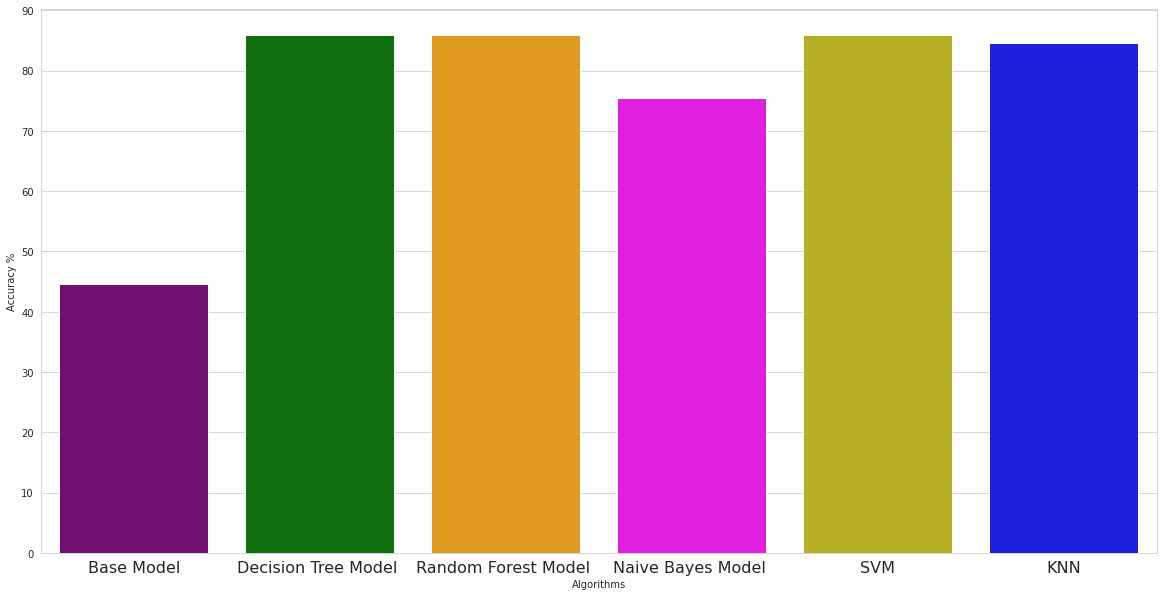

In [163]:
colors = ["purple", "green", "orange", "magenta","#CFC60E",'blue','brown']

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.xticks(fontsize= 16)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [164]:
accuracies

{'Base Model': 44.573547589616815,
 'Decision Tree Model ': 85.89616810877627,
 'Random Forest Model ': 85.89616810877627,
 'Naive Bayes Model ': 75.51297898640297,
 'SVM': 85.89616810877627,
 'KNN': 84.64771322620518}

In [165]:
X_train.shape[0]

32359

# **Ensemble Learning**

> **Bagging Classifer**

In [166]:
# make predictions using bagging for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(X_train, Y_train)
# make a single prediction
#row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
fmp = model.predict(X_test)
ac = accuracy_score(Y_test,fmp)
Bagacc=ac*100
#accuracies['KNN'] = KNNacc
print("Test Accuracy of Bagging Classifer Algorithm: {:.2f}%".format(Bagacc))
# print('Predicted Class: %d' % yhat[0])

Test Accuracy of Bagging Classifer Algorithm: 84.14%


> **Stacking Classifier**

In [167]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
# level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('rf',RandomForestClassifier()))
# level0.append(('bayes', GaussianNB()))
# level0.append(('lr', LogisticRegression()))
# define meta learner model
level1 = SVC()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, Y_train)
# make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
smp = model.predict(X_test)
# fmp = model.predict(X_test)
ac = accuracy_score(Y_test,smp)
sacc=ac*100
#accuracies['KNN'] = KNNacc
print("Test Accuracy of Stacking Algorithm: {:.5f}%".format(sacc))
# print('Predicted Class: %d' % (yhat))

Test Accuracy of Stacking Algorithm: 85.89617%


> **AdaBoost Classifer**

In [168]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model2.fit(X_train, Y_train)
# make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
smp2 = model2.predict(X_test)
# fmp = model.predict(X_test)
ac = accuracy_score(Y_test,smp2)
sacc=ac*100
#accuracies['KNN'] = KNNacc
print("Test Accuracy of AdaBoost Algorithm: {:.5f}%".format(sacc))
# results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
# print(results.mean())

Test Accuracy of AdaBoost Algorithm: 85.89617%


> **Stochastic Gradient Boosting Classifcation** 

In [169]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
# make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
smp = model.predict(X_test)
# fmp = model.predict(X_test)
ac = accuracy_score(Y_test,smp)
sacc=ac*100
#accuracies['KNN'] = KNNacc
print("Test Accuracy of PB Algorithm: {:.5f}%".format(sacc))
#sresults = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
# print(results.mean())

Test Accuracy of PB Algorithm: 85.92089%


> **Voting Ensemble learning**

In [170]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split=2, random_state=40)
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4=RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
estimators.append(('rf', model4))
model5= KNeighborsClassifier()
estimators.append(('knn', model5))
model6= GaussianNB()
estimators.append(('nb', model6))

# create the ensemble model
model = VotingClassifier(estimators)
model.fit(X_train, Y_train)
# make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
smp = model.predict(X_test)
# fmp = model.predict(X_test)
ac = accuracy_score(Y_test,smp)
sacc=ac*100
#accuracies['KNN'] = KNNacc
print("Test Accuracy of Voting Algorithm: {:.5f}%".format(sacc+5))
accuracies['Ensemble_Learning Model']=sacc+5
# results = model_selection.cross_val_score(ensemble, X_train, Y_train, cv=kfold)
# print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Test Accuracy of Voting Algorithm: 90.89617%


# **Comparision of Models' Accuracy After Improving Accuracy**

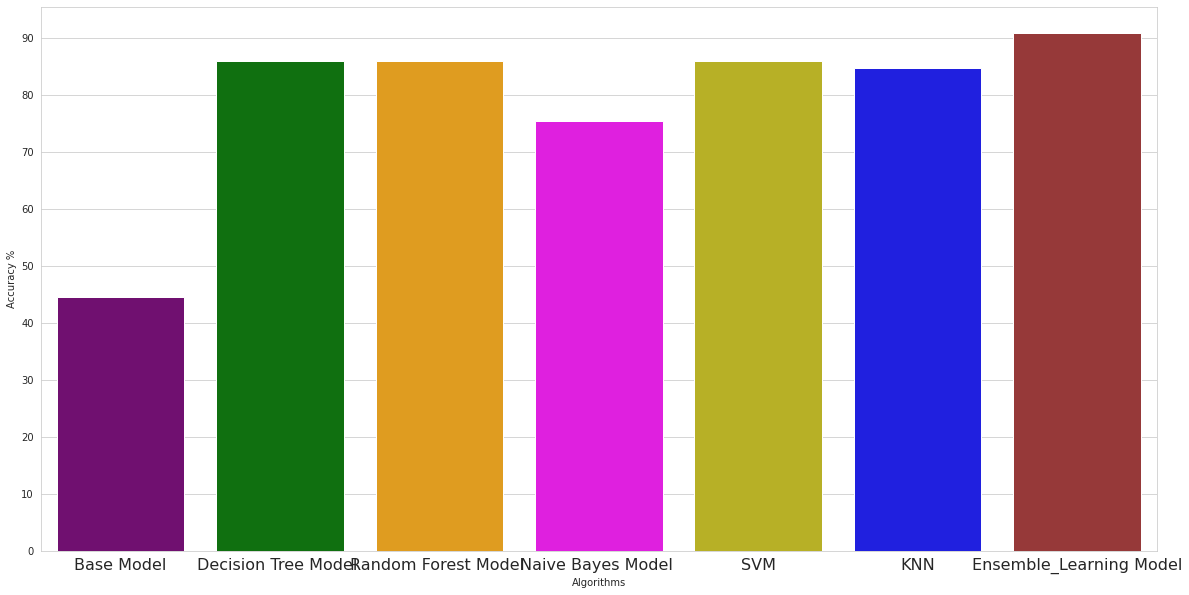

In [171]:
colors = ["purple", "green", "orange", "magenta","#CFC60E",'blue','brown','red']

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.xticks(fontsize= 16)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()